In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('2023clean.csv')

# Convert Unix epoch column to datetime objects
df['Timestamp'] = pd.to_datetime(df['epoch'], unit='s')


<Figure size 640x480 with 0 Axes>

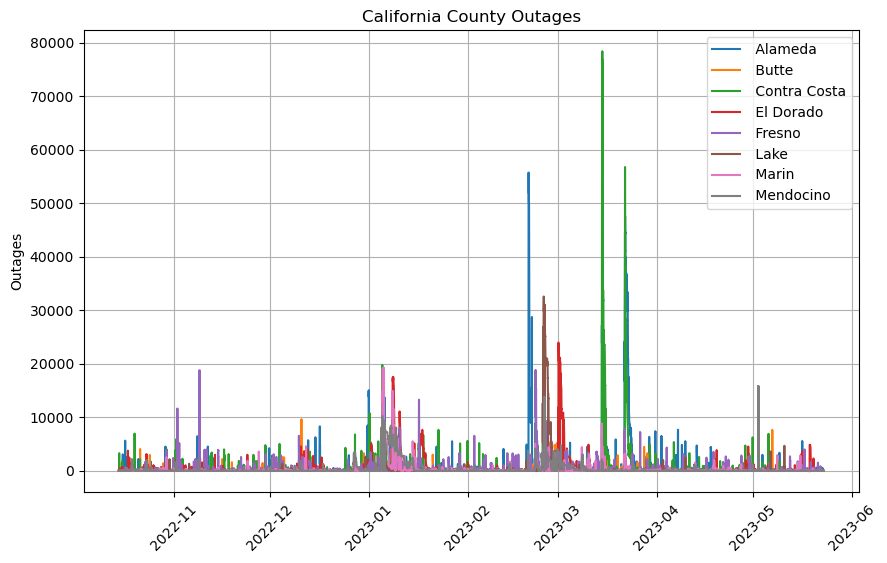

In [42]:

## Plot all columns on the same axis
plt.figure()  # Create a new figure
# Plot columns 2 through 10 on the same axis
plt.figure(figsize=(10, 6))  # Set the figure size

for column in df.columns[3:11]:
    plt.plot(df['Timestamp'], df[column], label=column)  # Plot the column data and set the label as the column name

plt.title('California County Outages')  # Set the title
#plt.xlabel('Index')  # Set the x-axis label
plt.ylabel('Outages')  # Set the y-axis label
plt.xticks(rotation=45)
plt.grid(True)  # Enable grid lines
plt.legend()  # Show the legend with column names
#plt.show()  # Show the plot
plt.savefig('county-bar.png', bbox_inches='tight', dpi=600)

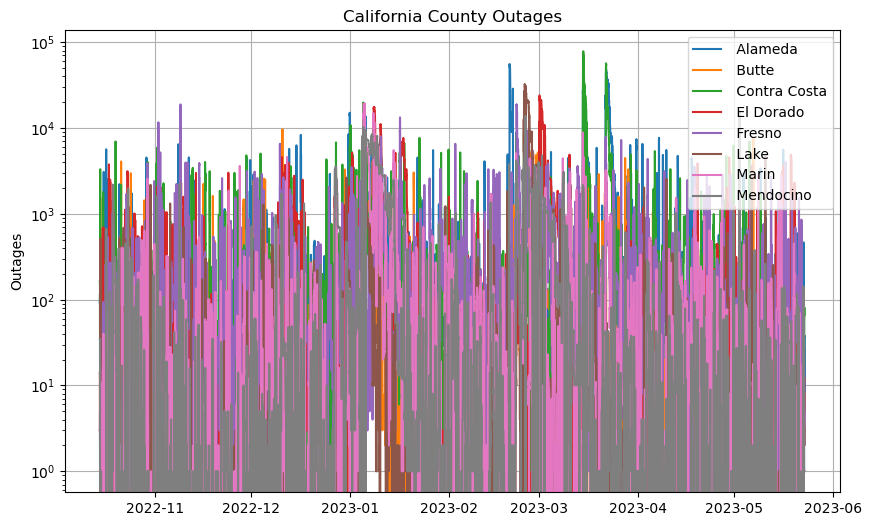

In [41]:


# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot columns 2 through 10 on the same axis
for column in df.columns[3:11]:
    ax.plot(df['Timestamp'], df[column], label=column)  # Plot the column data and set the label as the column name

ax.set_title('California County Outages')  # Set the title
ax.set_ylabel('Outages')  # Set the y-axis label
#ax.set_xticklabels(df['Timestamp'], rotation=45)
ax.grid(True)  # Enable grid lines
ax.legend()  # Show the legend with column names

ax.set_yscale('log')  # Set the y-axis scale to logarithmic

plt.savefig('county-bar-log.png', bbox_inches='tight', dpi=600)
plt.show()  # Show the plot

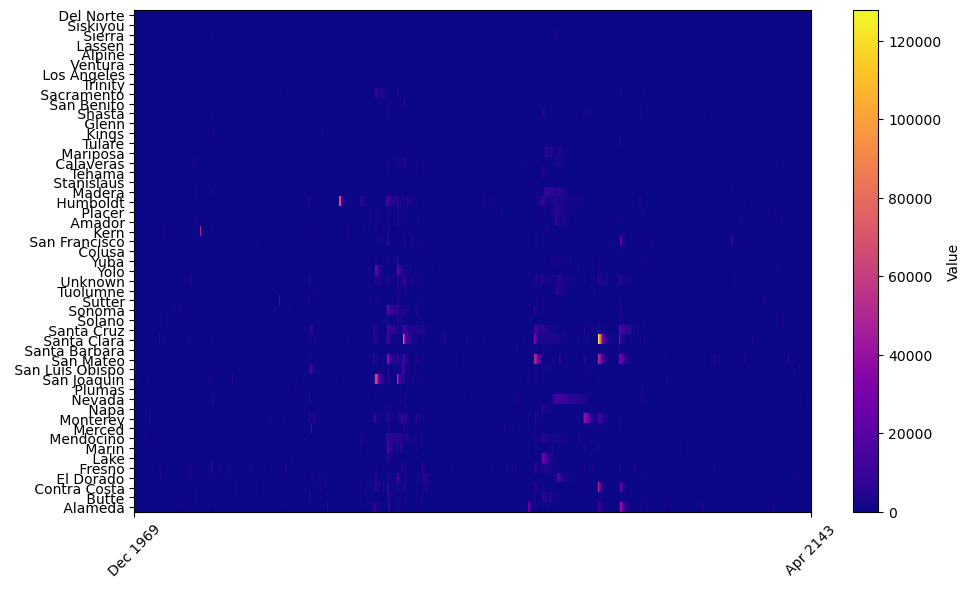

In [19]:


# Prepare the data for the image plot
data = df.iloc[:, 3:-1].values  # Extract the numerical data from columns 2 to 10



# Plot the data as an image
plt.figure(figsize=(10, 6))  # Set the figure size
plt.imshow(data.T, aspect='auto', cmap='plasma', origin='lower', interpolation='nearest')  # Plot the transposed data as an image
plt.colorbar(label='Value')  # Add a colorbar with label

plt.yticks(np.arange(len(df.columns[3:-1])), df.columns[3:-1])
plt.yticks(rotation=0)  # Rotate y-axis tick labels to horizontal orientation

# # Set the x-axis label and format the tick labels as months or days
months_locator = mdates.MonthLocator()  # Show tick labels at the beginning of each month
days_locator = mdates.DayLocator()  # Show tick labels at the beginning of each day
date_formatter = mdates.DateFormatter('%b %Y')  # Format tick labels as "Abbreviated Month Year" (e.g., Jan 2022)


#plt.gca().xaxis.set_minor_locator(days_locator)  # Set the minor tick locator to days
plt.gca().xaxis.set_major_formatter(date_formatter)  # Set the tick label formatter

# Reduce the number of x-axis ticks
max_ticks = 10
months_locator = mdates.MonthLocator(interval=max(1, int(len(df) / max_ticks)))  # Create a new MonthLocator instance with the desired interval
plt.gca().xaxis.set_major_locator(months_locator)  # Set the updated locator

plt.xticks(rotation=45)  # Rotate x-axis tick labels for better readability

plt.tight_layout()  # Adjust the spacing between subplots
#plt.show()  # Show the plot
plt.savefig('county-img.png', bbox_inches='tight', dpi=600);

/tmp/ipykernel_560127/695489671.py:15: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  mesh = ax.pcolormesh(X, Y, data.T, cmap='plasma')


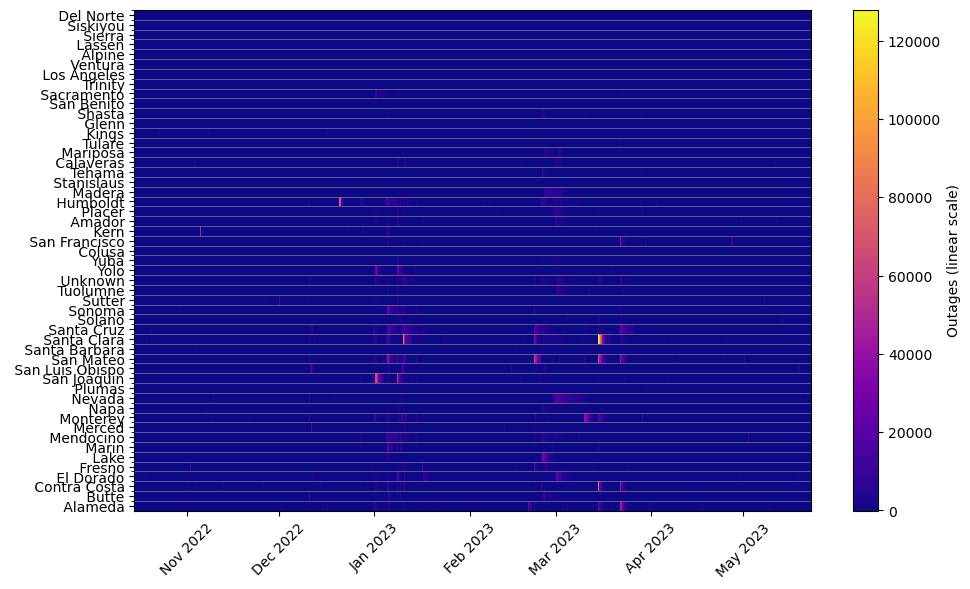

In [32]:



# Prepare the data for the image plot
data = df.iloc[:, 3:-1].values  # Extract the numerical data from columns 2 to 10

# Get the x-axis values using the converted datetime values
x = df['Timestamp'].values

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create a meshgrid of x and y values
X, Y = np.meshgrid(x, np.arange(data.shape[1]))

# Plot the data as a colored mesh
#linear
mesh = ax.pcolormesh(X, Y, data.T, cmap='plasma')

#log
#mesh = ax.pcolormesh(X, Y, np.log(data.T + 1) , cmap='plasma')

# Add a colorbar with label
#plt.colorbar(mesh, ax=ax, label='Outages (log scale)')
plt.colorbar(mesh, ax=ax, label='Outages (linear scale)')


# Add horizontal grid lines
yticks = np.arange(len(df.columns[3:-1])) + 0.5
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.grid(axis='y', linestyle='-', linewidth=0.5, color='gray', which='minor')



# Set the x-axis label and format the tick labels as months
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xticks(rotation=45)  # Rotate x-axis tick labels for better readability

# Add y-axis tick labels with column header names
plt.yticks(np.arange(len(df.columns[3:-1])), df.columns[3:-1])
plt.yticks(rotation=0)  # Rotate y-axis tick labels to horizontal orientation

plt.tight_layout()  # Adjust the spacing between subplots
plt.savefig('county-img-lin.png', bbox_inches='tight', dpi=600);